<a href="https://colab.research.google.com/github/grahamswanston/cap-comp215/blob/main/Final_Lab_GoL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Game of Life

Code examples from [Think Complexity, 2nd edition](https://thinkcomplex.com).

Copyright 2016 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import random

In [ ]:
ALIVE = 1
DEAD = 0

In [ ]:
""" Code example from Complexity and Computation, a book about
exploring complexity science with Python.  Available free from

http://greenteapress.com/complexity

Copyright 2016 Allen Downey
MIT License: http://opensource.org/licenses/MIT
"""

import numpy as np
import matplotlib.pyplot as plt

# Here's how animate works
# https://stackoverflow.com/questions/24816237/ipython-notebook-clear-cell-output-in-code
# https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.clear_output
    
from time import sleep
from IPython.display import clear_output

if not os.path.exists('utils.py'):
    !wget https://raw.githubusercontent.com/AllenDowney/ThinkComplexity2/master/notebooks/utils.py

class Cell2D:
    """Parent class for 2-D cellular automata."""

    def __init__(self, n, m=None):
        """Initializes the attributes.

        n: number of rows
        m: number of columns
        """

        m = n if m is None else m
        self.array = np.zeros((n, m), np.uint8)

    def add_cells(self, row, col, *strings):
        """Adds cells at the given location.

        row: top row index
        col: left col index
        strings: list of strings of 0s and 1s
        """
        for i, s in enumerate(strings):
            self.array[row+i, col:col+len(s)] = np.array([int(b) for b in s])

    def loop(self, iters=1):
        """Runs the given number of steps."""
        for i in range(iters):
            self.step()


    def draw(self, **options):
        """Draws the array.
        """
        draw_array(self.array, **options)

    def animate(self, frames, interval=None, step=None):
        """Animate the automaton.
        
        frames: number of frames to draw
        interval: time between frames in seconds
        iters: number of steps between frames
        """
        if step is None:
            step = self.step
            
        plt.figure()
        try:
            for i in range(frames-1):
                self.draw()
                plt.show()
                if interval:
                    sleep(interval)
                step()
                clear_output(wait=True)
            self.draw()
            plt.show()
        except KeyboardInterrupt:
            pass


def draw_array(array, **options):
    """Draws the cells."""
    n, m = array.shape
    defaults = {
                'cmap': 'Greens',
                'alpha': 0.7,
                'vmin': 0,
                'vmax': 1, 
                'interpolation': 'none', 
                'origin': 'upper',
                'extent': [0, m, 0, n]
                }

    options = {k: v for d in [defaults, options] for k, v in d.items()}

    plt.axis([0, m, 0, n])
    plt.xticks([])
    plt.yticks([])

    return plt.imshow(array, **options)

In [ ]:
options = {'colours': ['red', 'blue', 'green', 'yellow'],
           'size' : ['small', 'medium', 'large'],
           'shape': 'round',
           'growth' : 0.005
           }

defaults = {'colours' : ['yellow', 'orange', 'purple'],
            'size': 'small',
            'shape': 'square',
            'time': 'hh:mm:ss',
            'speed': '200'
            }

In [ ]:
#Merging options and defaults dictionaries, no change in defaults

dict3 = {**defaults, **options}
print(dict3)

dict4 = defaults.copy()
dict4.update(options)
print(dict4)
dict5 = {k: v for d in [options, defaults] for k, v in d.items()}
print(dict5)



{'colours': ['red', 'blue', 'green', 'yellow'], 'size': ['small', 'medium', 'large'], 'shape': 'round', 'time': 'hh:mm:ss', 'speed': '200', 'growth': 0.005}
{'colours': ['red', 'blue', 'green', 'yellow'], 'size': ['small', 'medium', 'large'], 'shape': 'round', 'time': 'hh:mm:ss', 'speed': '200', 'growth': 0.005}
{'colours': ['yellow', 'orange', 'purple'], 'size': 'small', 'shape': 'square', 'growth': 0.005, 'time': 'hh:mm:ss', 'speed': '200'}


###Exercise 2 Enumerating Elementary 2D CA’s?

In [ ]:
neighbourhood = np.array([[0,0,0],
                          [0,0,0],
                          [0,0,0]])

#9 locations with 2 possible states, so 2*2*2*2*2*2*2*2*2 or 2^9 = 512 possibilities

#from week 5 example

size_of_neighbourhood = 9            # for Wolfram's set of simple CA's
n_states_for_one_cell = 2            # on or off
n_neighbourhood_states = n_states_for_one_cell ** size_of_neighbourhood    # 2**9 == 512

print('Number of unique neighbourhood states for {n_state} state CA with neighbourhood size {n_size}: {n_rules}'.format(
    n_state=n_states_for_one_cell, n_size=size_of_neighbourhood, n_rules=n_neighbourhood_states
))

bit = (0,1)
states = [[(i,j,k),(l,m,n),(o,p,q)] for i in bit for j in bit for k in bit for l in bit for m in bit for n in bit for o in bit for p in bit for q in bit]
states[-25:]


Number of unique neighbourhood states for 2 state CA with neighbourhood size 9: 512


[[(1, 1, 1), (1, 0, 0), (1, 1, 1)],
 [(1, 1, 1), (1, 0, 1), (0, 0, 0)],
 [(1, 1, 1), (1, 0, 1), (0, 0, 1)],
 [(1, 1, 1), (1, 0, 1), (0, 1, 0)],
 [(1, 1, 1), (1, 0, 1), (0, 1, 1)],
 [(1, 1, 1), (1, 0, 1), (1, 0, 0)],
 [(1, 1, 1), (1, 0, 1), (1, 0, 1)],
 [(1, 1, 1), (1, 0, 1), (1, 1, 0)],
 [(1, 1, 1), (1, 0, 1), (1, 1, 1)],
 [(1, 1, 1), (1, 1, 0), (0, 0, 0)],
 [(1, 1, 1), (1, 1, 0), (0, 0, 1)],
 [(1, 1, 1), (1, 1, 0), (0, 1, 0)],
 [(1, 1, 1), (1, 1, 0), (0, 1, 1)],
 [(1, 1, 1), (1, 1, 0), (1, 0, 0)],
 [(1, 1, 1), (1, 1, 0), (1, 0, 1)],
 [(1, 1, 1), (1, 1, 0), (1, 1, 0)],
 [(1, 1, 1), (1, 1, 0), (1, 1, 1)],
 [(1, 1, 1), (1, 1, 1), (0, 0, 0)],
 [(1, 1, 1), (1, 1, 1), (0, 0, 1)],
 [(1, 1, 1), (1, 1, 1), (0, 1, 0)],
 [(1, 1, 1), (1, 1, 1), (0, 1, 1)],
 [(1, 1, 1), (1, 1, 1), (1, 0, 0)],
 [(1, 1, 1), (1, 1, 1), (1, 0, 1)],
 [(1, 1, 1), (1, 1, 1), (1, 1, 0)],
 [(1, 1, 1), (1, 1, 1), (1, 1, 1)]]

For a 3 cell neighbourhood, 2^8 = 256 rules

for a 9 cell neighbourhood, 2^512 =~ 1.34078*10^154 

It is believed all the matter in the universe is made up of the equivalent of 10^80 hydrogen atoms, so this is an ungodly ammount on rules

In [ ]:
states[1]

[(0, 0, 0), (0, 0, 0), (0, 0, 1)]

Since each of the 3 dimensions of the neighbourhood are 3 long, we can break them into 3 seperate units and use wolframs method to process each row into their 256 possible states, and enumerating each state as a tuple (1-256, 1-256, 1-256).

## Game of Life entities



In [ ]:
from scipy.signal import correlate2d


class Life(Cell2D):
    """Implementation of Conway's Game of Life."""
    kernel = np.array([[1, 1, 1],
                       [1,10, 1],
                       [1, 1, 1]])

    table = np.zeros(20, dtype=np.uint8)
    table[[3, 12, 13]] = 1

    def step(self):
        """Executes one time step."""
        is_alive = self.array==ALIVE
        is_dead = self.array==DEAD


        c = correlate2d(self.array, self.kernel, mode='same')
        self.array = self.table[c]

            
    def num_alive(self):
      return len(self.array[self.array == ALIVE])

    def num_dead(self):
      return len(self.array[self.array == DEAD])

The following function creates a `Life` object and sets the initial condition using strings of `0` and `1` characters.

In [ ]:
def make_life(n, m, row, col, *strings):
    """Makes a Life object.
    
    n, m: rows and columns of the Life array
    row, col: upper left coordinate of the cells to be added
    strings: list of strings of '0' and '1'
    """
    life = Life(n, m)
    life.add_cells(row, col, *strings)
    return life

A beehive is a stable entity, also called a "still life"

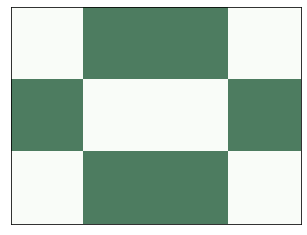

In [ ]:
# beehive
life = make_life(3, 4, 0, 0, '0110', '1001', '0110')
life.draw()
#plt.show('figs/chap06-1')

Here's what it looks like after one step:

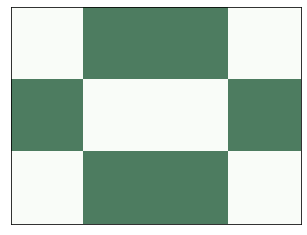

In [ ]:
life.step()
life.draw()

A toad is an oscillator with period 2.  Here's are its two configurations:

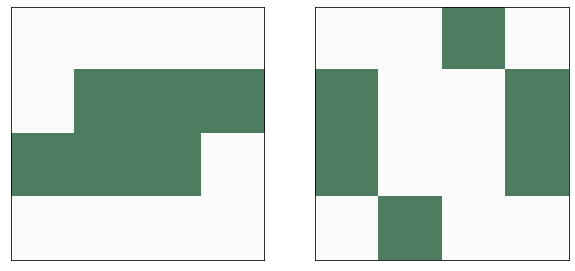

In [ ]:
# toad
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
life = make_life(4, 4, 1, 0, '0111', '1110')
life.draw()

plt.subplot(1, 2, 2)
life.step()
life.draw()

plt.show('figs/chap06-2')

Here's what the toad looks like as an animation.

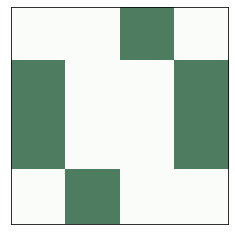

In [ ]:
life = make_life(4, 4, 1, 0, '0111', '1110')
life.animate(10, 0.5)

A glider is a spaceship that translates one unit down and to the right with period 4. 

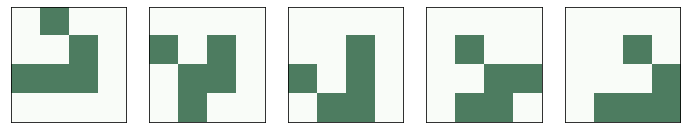

In [ ]:
# glider
plt.figure(figsize=(12, 4))

glider = ['010', '001', '111']
life = make_life(4, 4, 0, 0, *glider)

for i in range(1, 6):
    plt.subplot(1, 5, i)
    life.draw()
    life.step()
    
plt.show('figs/chap06-3')

Here's an animation showing glider movement.

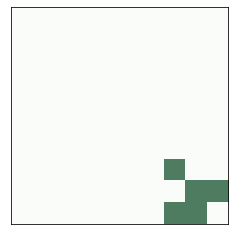

In [ ]:
life = make_life(10, 10, 0, 0, '010', '001', '111')
life.animate(frames=28, interval=0.2)

**Exercise:** If you start GoL from a random configuration, it usually runs chaotically for a while and then settles into stable patterns that include blinkers, blocks, and beehives, ships, boats, and loaves.

Start GoL in a random state and run it until it stabilizes (try 1000 steps).
What stable patterns can you identify?

Hint: use `np.random.randint`.

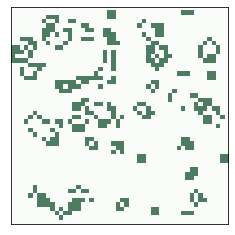

In [ ]:
def make_random_life(n, m, p):
    """Makes a Life object.
    
    n, m: rows and columns of the Life array
    p: probability of a cell being alive when initiated
    strings: list of strings of '0' and '1'
    """
    life = Life(n, m)
    life.array = np.random.choice([DEAD, ALIVE], size = (n, m), p=[1-p, p])
    return life

random_life = make_random_life(50, 50, 0.25)
random_life.animate(frames=28, interval=0.2)

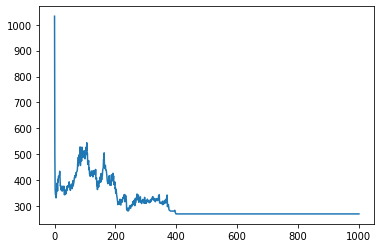

In [ ]:
def alive_cells(cell2D, run_length=1000):
  alive = [cell2D.num_alive()]
  for _ in range(run_length):
    cell2D.step()
    alive.append(cell2D.num_alive())
  return alive

test = make_random_life(100, 100, 0.1)
results_1 = alive_cells(test)
plt.plot(results_1)

In [ ]:
def test_data_storage(n=100, p=0.1, inc=0.05, runtime=1000, margin=5, j= 5):
  """run multiple tests with varying probababilities of initial alive cells, return a dict of results
  n: size of array
  p: starting probability of initially being alive
  inc: increment increase of probability for each test
  runtime: steps per test
  margin: number of times each state is tested
  j: number of tests to be done
  """

  results = []
  
  for i in range(j):
    for r in range(margin):
      test_life = make_random_life(n, n, p)
      cell_count = alive_cells(test_life, runtime)
      run = {
              'name' : f"test {i}:{r}",
              'probability': '{p}'.format(p=p),
              'alive_cells': cell_count,
             }

      results.append(run)
    p = (p + inc)
  return results

filled_dict = test_data_storage()

In [ ]:
for i in range(len(filled_dict)):
  window = 7
  steady_state = []

#def count_to_steady(**dict):



0.1
0.1
0.1
0.1
0.1
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.15000000000000002
0.2
0.2
0.2
0.2
0.2
0.25
0.25
0.25
0.25
0.25
0.3
0.3
0.3
0.3
0.3


### Methuselas

Most initial conditions run for a short time and reach a steady state.  But some initial conditional run for a surprisingly long time; they are called Methuselahs.

The r-pentomino starts with only five live cells, but it runs for 1103 steps before stabilizing.

In [ ]:
# r pentomino
rpent = ['011', '110', '010']
life = make_life(3, 3, 0, 0, *rpent)
life.draw()

Here are the start and finish configurations.

In [ ]:
# r pentomino
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
life = make_life(120, 120, 50, 45, *rpent)
life.draw()

for i in range(1103):
    life.step()

plt.subplot(1, 2, 2)
life.draw()

plt.show('figs/chap06-4')

And here's the animation that shows the steps.

In [ ]:
life = make_life(120, 120, 50, 45, *rpent)
life.animate(frames=1200)

### Conway's conjecture

Most initial conditions run for a short time and reach a steady state.  Some, like the r-pentomino, run for a long time before they reach steady state.  Another example is rabbits, which starts with only nine cells and runs 17331 steps before reaching steady state.

To run my implementation of rabbits, open a terminal in `ThinkComplexity2/code` and run

```
python LifeRabbits.py
```

Patterns that take a long time to reach steady state are called Methuselahs.

Patterns like these prompted Conway's conjecture, which asks whether there are any initial conditions where the number of live cells is unbounded.

Gosper's glider gun was the first entity to be discovered that produces an unbounded number of live cells, which refutes Conway's conjecture.

In [ ]:
glider_gun = [
    '000000000000000000000000100000000000',
    '000000000000000000000010100000000000',
    '000000000000110000001100000000000011',
    '000000000001000100001100000000000011',
    '110000000010000010001100000000000000',
    '110000000010001011000010100000000000',
    '000000000010000010000000100000000000',
    '000000000001000100000000000000000000',
    '000000000000110000000000000000000000'
]

Here's the initial configuration:

In [ ]:
life = make_life(11, 38, 1, 1, *glider_gun)
life.draw()

plt.show('figs/chap06-5')

And here's what it looks like running:

In [ ]:
life = make_life(50, 50, 2, 2, *glider_gun)
life.animate(frames=200)

**Puffer train**

Another way to "refute" Conway's conjecture is a puffer train.

To see a puffer train run, open a terminal and run

```
python LifePuffer.py
```

### Implementing Game of Life

As an example, I'll start with an array of random cells:

In [ ]:
a = np.random.randint(2, size=(10, 10), dtype=np.uint8)
print(a)

The following is a straightforward translation of the GoL rules using `for` loops and array slicing.

In [ ]:
b = np.zeros_like(a)
rows, cols = a.shape
for i in range(1, rows-1):
    for j in range(1, cols-1):
        state = a[i, j]
        neighbors = a[i-1:i+2, j-1:j+2]
        k = np.sum(neighbors) - state
        if state:
            if k==2 or k==3:
                b[i, j] = 1
        else:
            if k == 3:
                b[i, j] = 1

print(b)

Here's a smaller, faster version using cross correlation.

In [ ]:
from scipy.signal import correlate2d

kernel = np.array([[1, 1, 1],
                   [1, 0, 1],
                   [1, 1, 1]])

c = correlate2d(a, kernel, mode='same')
b = (c==3) | (c==2) & a
b = b.astype(np.uint8)
print(b)

Using a kernel that gives a weight of 10 to the center cell, we can simplify the logic a little.

In [ ]:
kernel = np.array([[1, 1, 1],
                   [1,10, 1],
                   [1, 1, 1]])

c = correlate2d(a, kernel, mode='same')
b = (c==3) | (c==12) | (c==13)
b = b.astype(np.uint8)
print(b)

More importantly, the second version of the kernel makes it possible to use a look up table to get the next state, which is faster and even more concise.

In [ ]:
table = np.zeros(20, dtype=np.uint8)
table[[3, 12, 13]] = 1
c = correlate2d(a, kernel, mode='same')
b = table[c]
print(b)

**Exercise:** Many Game of Life patterns are available in portable file formats.
Write a function to parse one of these formats and initialize the array.

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

In [ ]:
life.draw()

In [ ]:
# Solution goes here

### Highlife

One variation of GoL, called "Highlife", has the
same rules as GoL, plus one additional rule: a dead cell with 6
neighbors comes to life.

You can try out different rules by inheriting from `Life` and changing the lookup table.

**Exercise:** Modify the table below to add the new rule.

In [ ]:
# Starter code

class MyLife(Life):
    """Implementation of Life."""

    table = np.zeros(20, dtype=np.uint8)
    table[[3, 12, 13]] = 1

One of the more interesting patterns in Highlife is the replicator, which has the following initial configuration.


In [ ]:
replicator = [
    '00111',
    '01001',
    '10001',
    '10010',
    '11100'
]

Make a `MyLife` object with `n=100` and use `add_cells` to put a replicator near the middle.

Make an animation with about 200 frames and see how it behaves.

In [ ]:
# Solution goes here

**Exercise:** 

If you generalize the Turing machine to two dimensions, or
add a read-write head to a 2-D CA, the result is a
cellular automaton called a Turmite.  It is named after a
termite because of the way the read-write head moves, but
spelled wrong as an homage to Alan Turing.

The most famous Turmite is Langton's Ant, discovered by Chris Langton
in 1986.

The ant is a read-write head with
four states, which you can think of as facing north, south,
east or west.  The cells have two states, black and white.

The rules are simple.  During each time step, the ant checks the color
of the cell it is on.  If black, the ant turns to the right,
changes the cell to white, and moves forward one space.  If the cell
is white, the ant turns left, changes the cell to black, and moves
forward.

Given a simple world, a simple set of rules, and only one moving part,
you might expect to see simple behavior---but you should know
better by now.  Starting with all white cells, Langton's ant
moves in a seemingly random pattern for more than 10 000 steps
before it enters a cycle with a period of 104 steps.  After
each cycle, the ant is translated diagonally, so it leaves
a trail called the "highway".

Write an implementation of Langton's Ant.

In [ ]:
# Solution goes here

In [ ]:
n = 5
turmite = Turmite(n)
turmite.draw()

In [ ]:
turmite.step()
turmite.draw()

In [ ]:
# Solution goes here

In [ ]:
# And a larger version with 1000 steps

turmite = Turmite(n=30)
anim = turmite.animate(frames=1000)

In [ ]:
# Solution goes here